Colab 🤩 -> 

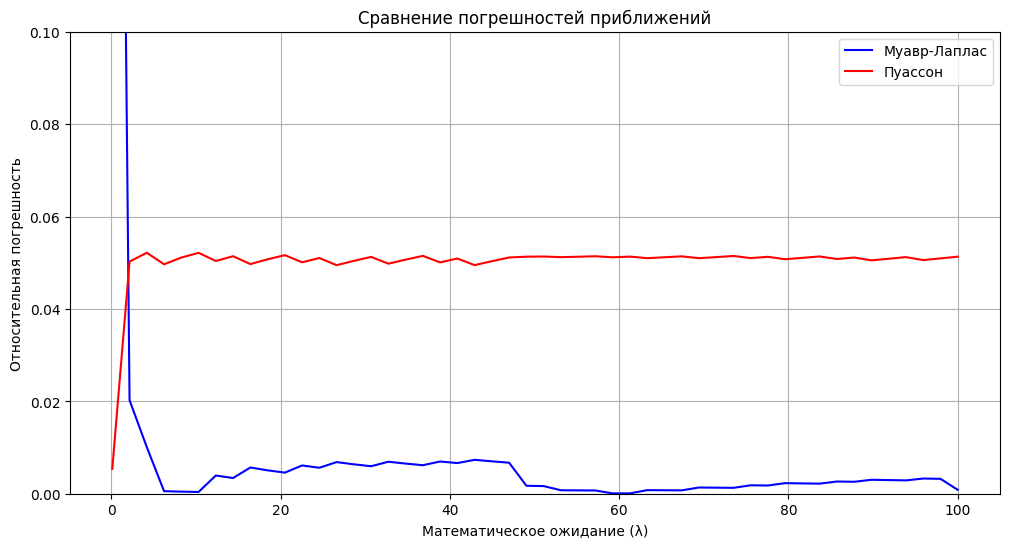


Численные результаты для некоторых значений λ:


,λ,Ошибка М-Л,Ошибка Пуассона
0,0.100000,0.397716,0.005375
1,10.293878,0.000381,0.052139
2,20.487755,0.004566,0.051637
3,30.681633,0.005950,0.051256
4,40.875510,0.006634,0.050907
5,51.069388,0.001653,0.051344
6,61.263265,0.000074,0.051323
7,71.457143,0.001308,0.051216
8,81.651020,0.002234,0.051057
9,91.844898,0.002952,0.050862



Численные результаты для λ от 0.1 до 10:


,λ,Ошибка М-Л,Ошибка Пуассона
0,0.100000,0.397716,0.005375
1,2.138776,0.020242,0.050237
2,4.177551,0.010078,0.052161
3,6.216327,0.000551,0.049661
4,8.255102,0.000452,0.051117
5,10.293878,0.000381,0.052139


In [88]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.special import factorial
import matplotlib.pyplot as plt
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')

def binomial_probability(n, p, k):
    """Точное биномиальное распределение"""
    return np.math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

def moivre_laplace(n, p, k):
    """Интегральная теорема Муавра-Лапласа"""
    mu = n * p
    sigma = np.sqrt(n * p * (1 - p))
    z = (k - mu) / sigma
    return (1 / sigma) * norm.pdf(z)

def poisson(lambda_, k):
    """Формула Пуассона"""
    return (lambda_ ** k * np.exp(-lambda_)) / factorial(k)

# Параметры для расчета
p = 0.1  # вероятность успеха
lambda_values = np.linspace(0.1, 100, 50)  # различные значения мат. ожидания
errors_ml = []  # ошибки Муавра-Лапласа
errors_poisson = []  # ошибки Пуассона
ml_prob_ = []
poisson_prob_ = []
binom_prob = []

for lambda_ in lambda_values:
    n = int(lambda_ / p)  # количество испытаний
    k = int(lambda_)  # количество успехов
    
    # Вычисление точной вероятности
    exact_prob = binomial_probability(n, p, k)
    
    # Вычисление приближений
    ml_prob = moivre_laplace(n, p, k)
    poisson_prob = poisson(lambda_, k)
    
    # Вычисление относительных ошибок
    error_ml = abs(exact_prob - ml_prob) / exact_prob if exact_prob != 0 else 0
    error_poisson = abs(exact_prob - poisson_prob) / exact_prob if exact_prob != 0 else 0
    
    errors_ml.append(error_ml)
    errors_poisson.append(error_poisson)
    ml_prob_.append(ml_prob)
    poisson_prob_.append(poisson_prob)
    binom_prob.append(exact_prob)

plt.figure(figsize=(12, 6))
plt.plot(lambda_values, errors_ml, label='Муавр-Лаплас', color='blue')
plt.plot(lambda_values, errors_poisson, label='Пуассон', color='red')
plt.xlabel('Математическое ожидание (λ)')
plt.ylabel('Относительная погрешность')
plt.title('Сравнение погрешностей приближений')
plt.legend()
plt.grid(True)
plt.ylim(0, 0.1)  # ограничение по оси y
# plt.yscale('log')  # логарифмическая шкала для лучшей визуализации
plt.show()

results = {
    'λ': [],
    'Ошибка М-Л': [],
    'Ошибка Пуассона': []
}

for i in range(0, len(lambda_values), 5):
    results['λ'].append(lambda_values[i])
    results['Ошибка М-Л'].append(errors_ml[i])
    results['Ошибка Пуассона'].append(errors_poisson[i])

df_results = pd.DataFrame(results)

print("\nЧисленные результаты для некоторых значений λ:")
display(df_results)

results = {
    'λ': [],
    'Ошибка М-Л': [],
    'Ошибка Пуассона': []
}

print("\nЧисленные результаты для λ от 0.1 до 10:")
for i in range(0, 5 + 1):
    results['λ'].append(lambda_values[i])
    results['Ошибка М-Л'].append(errors_ml[i])
    results['Ошибка Пуассона'].append(errors_poisson[i])

df_results = pd.DataFrame(results)
display(df_results)

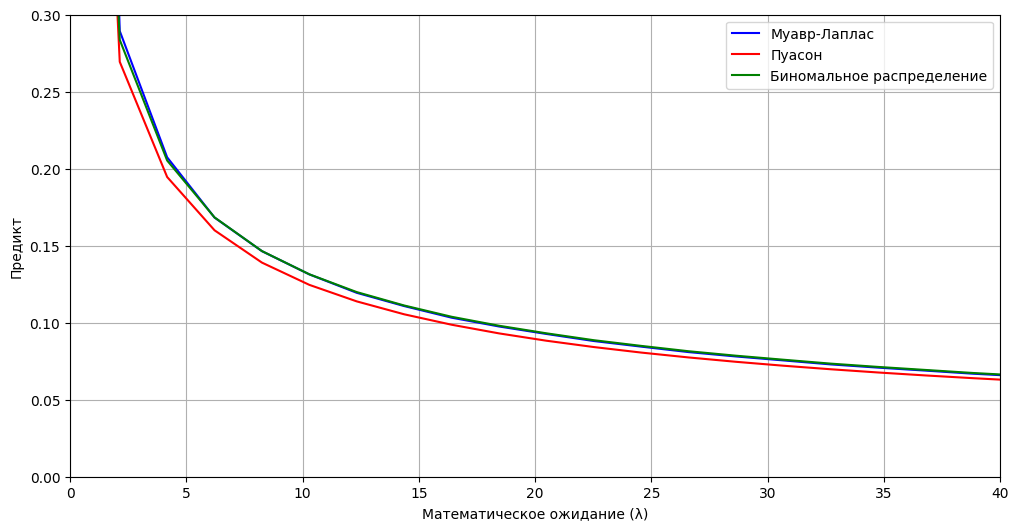

In [84]:
fig = plt.figure(figsize=(12, 6))

plt.plot(lambda_values, ml_prob_, label = "Муавр-Лаплас", color = "blue")
plt.plot(lambda_values, poisson_prob_, label = "Пуасон", color = "red")
plt.plot(lambda_values, binom_prob, label = "Биномальное распределение", color = "green")
plt.xlabel('Математическое ожидание (λ)')
plt.ylabel('Предикт')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0, 40)
plt.ylim(0, 0.3)
plt.grid(True)
plt.show()